In [1]:
import numpy as np
import keras
from keras.applications import vgg16

model =vgg16.VGG16(weights='imagenet')

Using TensorFlow backend.


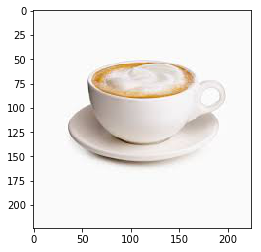

In [79]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt
%matplotlib inline
filename = "img.jpg"
org_img = load_img(filename, target_size=(model.input_shape[1], model.input_shape[2]))
plt.imshow(org_img)
plt.show()

In [80]:
from keras.applications.vgg16 import preprocess_input, decode_predictions
nrow = model.input_shape[1]
ncol = model.input_shape[2]
nchan = model.input_shape[3]
batch_shape = (1,nrow,ncol,nchan)
x = np.zeros(batch_shape)
x[0,:,:,:] = org_img

In [236]:
org_pred = model.predict(x)
dec_org_pred = decode_predictions(org_pred)
dec_org_pred


[[('n07930864', 'cup', 0.94683927),
  ('n03937543', 'pill_bottle', 0.0072032143),
  ('n04263257', 'soup_bowl', 0.0052245213),
  ('n04332243', 'strainer', 0.004388819),
  ('n04398044', 'teapot', 0.0039917952)]]

In [105]:
from keras import backend as k
model.output

<tf.Tensor 'predictions/Softmax:0' shape=(?, 1000) dtype=float32>

In [240]:
from keras import losses
def FGSM_attack(img, target, step, num_steps, model):
    out = model.output_shape
    inputs = model.inputs
    for s in range(0,num_steps):
        loss = k.mean(out)
        grad = k.gradients(loss, [model.inputs])[0]
#         grad = k.gradients(model.output, model.input)[0]
        f = k.function([inputs], [grad])
        g_value = f([img,target])
        img = (img - step*np.sign(g_value))[0]
    return img

In [241]:
import random
t = np.zeros([1,1000])
r = random.randint(0,1000)
t[0,r] = 1
decode_predictions(t)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [242]:
xn = FGSM_attack(x, org_pred, 100, 1, model)


AttributeError: The layer "vgg16 has multiple inbound nodes, with different output shapes. Hence the notion of "output shape" is ill-defined for the layer. Use `get_output_shape_at(node_index)` instead.

(1, 224, 224, 3)


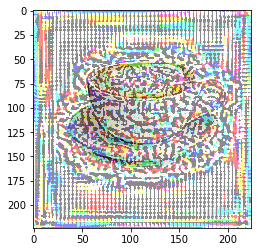

[[('n03485794', 'handkerchief', 0.53539336),
  ('n04476259', 'tray', 0.21384926),
  ('n03938244', 'pillow', 0.10371237),
  ('n03998194', 'prayer_rug', 0.055643197),
  ('n02730930', 'apron', 0.035870284)]]

In [207]:
print(xn.shape)
plt.imshow(array_to_img(xn[0]))
plt.show()
decode_predictions(model.predict(xn))
